# Learning curves - Compare ML models
This code generates learning curve from the output of multiple runs of ... <br>

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

# New scripts
Current status ... <br>
TODO: ... <br>

In [5]:
save = False
if save:
    outdir = Path('lrn_crv_analysis')
    os.makedirs(outdir, exist_ok=True)

# CCLE
# src_name = 'ccle'
# desc = [('lgb',           'ccle.lgb_reg.cvf5.rna.dsc.AUC_2019-6-19_h18-m45'),
#         ('nn_model0_sgd', 'ccle.nn_model0.sgd.cvf5.rna.dsc.AUC_2019-6-21_h12-m13'),
#         ('nn_model1_sgd', 'ccle.nn_model1.sgd.cvf5.rna.dsc.AUC_2019-6-21_h13-m28'),
#         ('nn_model0_clr', 'ccle.nn_model0.clr.cvf5.rna.dsc.AUC_2019-6-24_h7-m51'),
#         ('nn_model1_clr', 'ccle.nn_model1.clr.cvf5.rna.dsc.AUC_2019-6-24_h7-m51'),
# ]

# GDSC
# src_name = 'gdsc'
# desc = [('lgb',           'gdsc.lgb_reg.cvf5.rna.dsc.AUC_2019-6-20_h11-m24'),
#         ('nn_model0_sgd', 'gdsc.nn_model0.sgd.cvf5.rna.dsc.AUC_2019-6-21_h13-m32'),
#         ('nn_model1_sgd', 'gdsc.nn_model1.sgd.cvf5.rna.dsc.AUC_2019-6-21_h23-m16'),
#         ('nn_model0_clr', 'gdsc.nn_model0.clr.cvf5.rna.dsc.AUC_2019-6-20_h11-m9'),
#         ('nn_model1_clr', 'gdsc.nn_model1.clr.cvf5.rna.dsc.AUC_2019-6-20_h11-m24'),
# ]

# Top6
src_name = 'top6'
desc = [('lgb',           'top6.lgb_reg.cvf5.rna.dsc.AUC1_2019-6-20_h15-m29'),
        ('nn_model0_sgd', 'top6.nn_model0.sgd.cvf5.rna.dsc.AUC1_2019-6-21_h23-m20'),
        ('nn_model1_sgd', 'top6.nn_model1.sgd.cvf5.rna.dsc.AUC1_2019-6-22_h22-m44'),
        ('nn_model0_clr', 'top6.nn_model0.clr.cvf5.rna.dsc.AUC1_2019-6-20_h16-m49'),
        ('nn_model1_clr', 'top6.nn_model1.clr.cvf5.rna.dsc.AUC1_2019-6-20_h16-m50'),
       ]

datadir = '../out'
prj = 'lrn_crv'


# Models
runs = {}
for i, v in enumerate(desc):
    runs[f'run{i}'] = (v[0], Path.cwd()/datadir/prj/v[1]/f'lrn_crv_scores_{src_name}.csv')
    
# runs = {'run1': (desc[0][0], Path.cwd()/datadir/prj/desc[0][1]/f'lrn_crv_scores_{src_name}.csv'),
#         'run2': (desc[1][0], Path.cwd()/datadir/prj/desc[1][1]/f'lrn_crv_scores_{src_name}.csv'),
#         'run3': (desc[2][0], Path.cwd()/datadir/prj/desc[2][1]/f'lrn_crv_scores_{src_name}.csv'),
#         'run4': (desc[3][0], Path.cwd()/datadir/prj/desc[3][1]/f'lrn_crv_scores_{src_name}.csv'),
#         'run5': (desc[4][0], Path.cwd()/datadir/prj/desc[4][1]/f'lrn_crv_scores_{src_name}.csv'),
#        }

## Metric per plot for all runs

In [6]:
# colors = ['b', 'r', 'k', 'c', 'm']
# met_name = 'mean_absolute_error'

# k='run3'
# df = pd.read_csv(runs[k][1])
# cvf = len([c for c in df.columns.tolist() if c[0]=='f'])

# dfm = df[df['metric']==met_name].reset_index(drop=True)

# tr_sizes  = dfm['tr_size'].unique()
# te_scores = dfm.loc[dfm['tr_set']==False, dfm.columns[-cvf:]].values

# te_scores_mean = np.mean(te_scores, axis=1)
# te_scores_std  = np.std(te_scores, axis=1)

# j=0
# plt.plot(tr_sizes, te_scores_mean, '.--', color=colors[j], label=runs[k][0])

# plt.fill_between(tr_sizes,
#                  te_scores_mean - te_scores_std,
#                  te_scores_mean + te_scores_std,
#                  alpha=0.1, color=colors[j]); # new

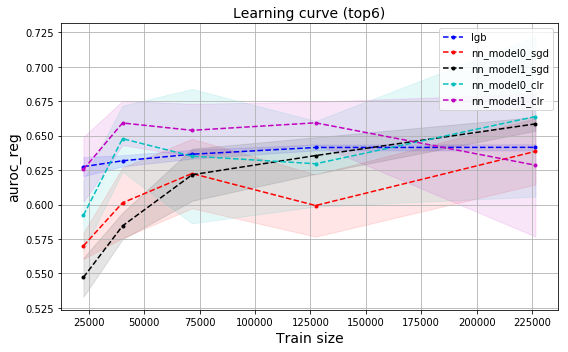

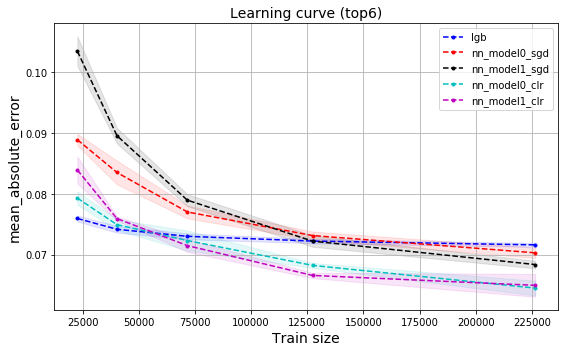

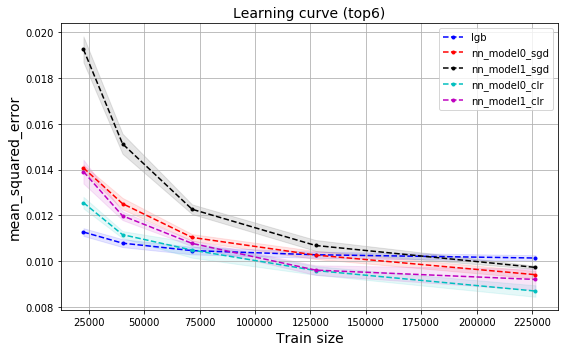

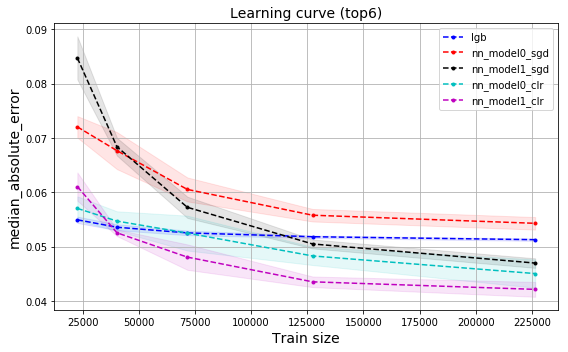

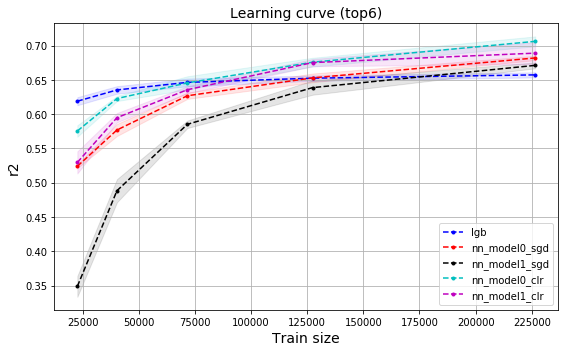

In [7]:
# Same metric for different runs
tmp = pd.read_csv(runs['run1'][1])
metrics = tmp['metric'].unique()

colors = ['b', 'r', 'k', 'c', 'm']
title = None
    
for i, met_name in enumerate(metrics):
        
    plt.figure(figsize=(8, 5))
        
    for j, (k, v) in enumerate(runs.items()):
        df = pd.read_csv(runs[k][1])
        cvf = len([c for c in df.columns.tolist() if c[0]=='f']) # get the number of cv_folds
        
        dfm = df[df['metric']==met_name].reset_index(drop=True)  # scores for a specific metric 

        tr_sizes  = dfm['tr_size'].unique() # new
        te_scores = dfm.loc[dfm['tr_set']==False, dfm.columns[-cvf:]] # new

        te_scores_mean = np.mean(te_scores, axis=1)
        te_scores_std  = np.std(te_scores, axis=1)
        
        plt.plot(tr_sizes, te_scores_mean, '.--', color=colors[j], label=runs[k][0])# new

        plt.fill_between(tr_sizes,
                         te_scores_mean - te_scores_std,
                         te_scores_mean + te_scores_std,
                         alpha=0.1, color=colors[j])
        
        plt.title(f'Learning curve ({src_name})', fontsize=14)
        
        plt.xlabel('Train size', fontsize=14)
        plt.ylabel(met_name, fontsize=14)
        plt.legend(loc='best')

    plt.tight_layout()
    plt.grid(True)
    
    if save:
        plt.savefig( outdir/(met_name+'.png') )

In [ ]:
# # Same metric for different runs
# src_name = 'top6'

# for j, met_name in enumerate(df['metric'].unique()):
        
#     plt.figure(figsize=(8, 5))
        
#     for i, (k, v) in enumerate(runs.items()):
#         df = pd.read_csv(runs[k][1])
        
#         d = df[df['metric'] == met_name]  # scores for a specific metric
#         # d = d[d['src'] == src_name]  # scores for a specific source       
        
#         d_vl = d[d['tr_set'] == False]     # scores of val set
#         plt.plot(d_vl['tr_size'], d_vl['f0'], '.--', label=runs[k][0])
        
#         plt.title(f'Learning curve ({src_name})', fontsize=14)
        
#         plt.xlabel('Train size', fontsize=14)
#         plt.ylabel(met_name, fontsize=14)
#         plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

#     plt.tight_layout()
#     plt.grid(True)
    
#     if save:
#         plt.savefig( outdir/(met_name+'.png') )

In [18]:
# https://github.com/bckenstler/CLR

In [19]:
base_lr=0.0001  # 0.001
max_lr=0.001    # 0.006
step_size=2000.
mode='exp_range'
gamma=0.99994
scale_fn=None
scale_mode='cycle'

In [20]:
batch = 32
datasize = 20386
iterations = 20386/batch

In [39]:
cycle = np.floor(1+iterations/(2*step_size))
x = np.abs(iterations/step_size - 2*cycle + 1)
lr= base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))*gamma**(iterations)